## 회귀분석 1주차

사실 회귀분석 자체는 R에서 구현하는것이 여러면에서 더 편하고, 자료도 훨씬 많습니다. 

회귀분석 1, 2주차 내용은 R로 하는것이 훨씬 편합니다...따라서 간단하게만 보여드릴게요!

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt 

In [7]:
data = pd.read_csv('delivery.csv')

In [8]:
data.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [20]:
data.rename(columns={"n.prod": "n_prod"}, inplace = True)
# 이름 오류날 수 있어서 변경

In [18]:
data.head()

,n_prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


### Multiple Regression

In [22]:
model1 = smf.ols(formula = 'delTime ~ n_prod + distance', data = data)
lm_result = model1.fit()
lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delTime   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           4.69e-16
Time:                        13:19:46   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.044       0.067       4.616
n_prod         1.6159      0.171      9.464      0.000       1.262       1.970
distance       0.0144      0.004      3.981      0.001       0.007       0.022
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.010
Skew:                           0.032   Prob(JB):                        0.995
Kurtosis:                       3.073   Cond. No.                         873.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
infl = lm_result.get_influence()
cookd = infl.summary_frame()['cooks_d']
print(cookd)

0     0.100092
1     0.003376
2     0.000009
3     0.077647
4     0.000543
5     0.000123
6     0.002172
7     0.003051
8     3.419318
9     0.053845
10    0.016200
11    0.001596
12    0.002295
13    0.003293
14    0.000632
15    0.003289
16    0.000401
17    0.043978
18    0.011919
19    0.132445
20    0.050861
21    0.451045
22    0.029899
23    0.102322
24    0.000108
Name: cooks_d, dtype: float64


cook distance는 확인할 수 있는데....R처럼 간단하게 플랏으로 보여주는 등의 편의성이 떨어짐.

### median regression

In [24]:
mod = smf.quantreg('delTime ~ n_prod + distance', data)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                delTime   Pseudo R-squared:               0.7567
Model:                       QuantReg   Bandwidth:                       2.680
Method:                 Least Squares   Sparsity:                        5.997
Date:                Sat, 05 Sep 2020   No. Observations:                   25
Time:                        13:20:56   Df Residuals:                       22
                                        Df Model:                            2
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6621      1.009      3.629      0.001       1.570       5.755
n_prod         1.4272      0.157      9.086      0.000       1.101       1.753
distance       0.0143      0.003      4.290      0.000       0.007       0.021
==============================================================================
"""

### Huber M

In [26]:
norms = sm.robust.norms
help(norms.HuberT.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Huber's t weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1          for \|z\| <= t
    
        weights(z) = t/\|z\|      for \|z\| > t



In [28]:
def plot_weights(support, weights_func, xlabels, xticks):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(support, weights_func(support))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=16)
    ax.set_ylim(-.1, 1.1)
    return ax

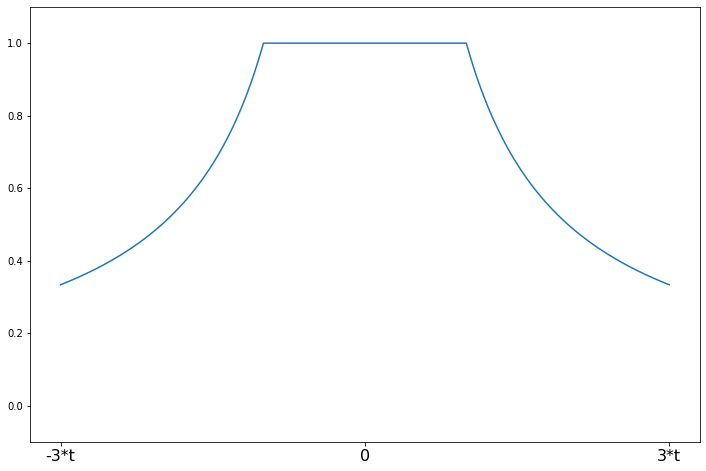

In [29]:
t = 1.345
support = np.linspace(-3*t, 3*t, 1000)
huber = norms.HuberT(t=t)
plot_weights(support, huber.weights, ['-3*t', '0', '3*t'], [-3*t, 0, 3*t]);

음 근데 이를 구현하는 코드가 이해하기 어렵게 되어있다! 그냥 R로 하자.....!!!

#### 3주차의 경우에는 Sklearn이라는 패키지를 통해 편하게 모델링이 가능하니 파이썬lover들은 3주차를 봐주세요 ㅠ